#                              HR Analytics Project     
Exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build Machine Learning model using variables
Measure the accuracy of the model

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

In [17]:
df=pd.read_csv('HR_Analytics.csv')

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,1,0,sales,low
1,0.80,0.86,5,262,6,1,0,sales,medium
2,0.11,0.88,7,272,4,1,0,sales,medium
3,0.72,0.87,5,223,5,1,0,sales,low
4,0.37,0.52,2,159,3,1,0,sales,low


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [20]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


# Exploratory Data Analysis

In [28]:
left=df[df.left==1]

In [29]:
left.shape

(3571, 9)

In [30]:
retained=df[df.left==0]

In [31]:
retained.shape

(11428, 9)

In [32]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
left,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.005321


In [ ]:
**We Conclude from Above
*Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
*Average Monthly hours are higher in employees leaving the Firm(199 vs 207)
*Promotion last 5 years employees who given promotion are likely to retained at firm.

In [ ]:
**Create bar Chart of Impact of salary on employee retention

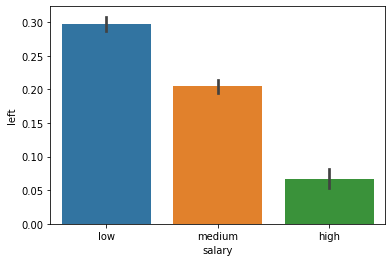

In [9]:
sns.barplot(x='salary',y='left',data=df)

In [ ]:
**Create bar chart of Department wise employee retention rate

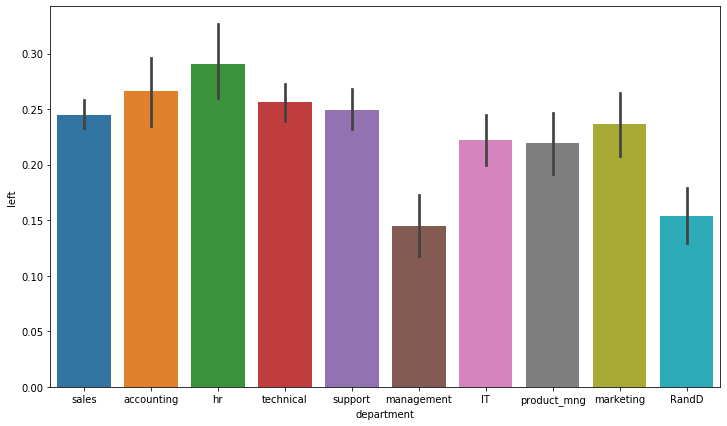

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(x='department',y='left',data=df)
plt.show()

In [ ]:
**Create Bar Chart of Satisfaction Level

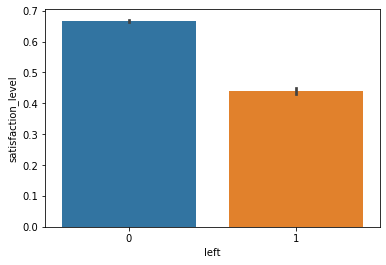

In [17]:
sns.barplot(x = 'left',y = 'satisfaction_level' , data = df)

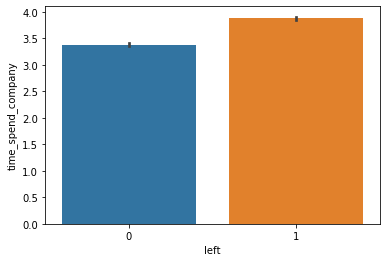

In [13]:
sns.barplot(x = 'left',y = 'time_spend_company' , data = df)

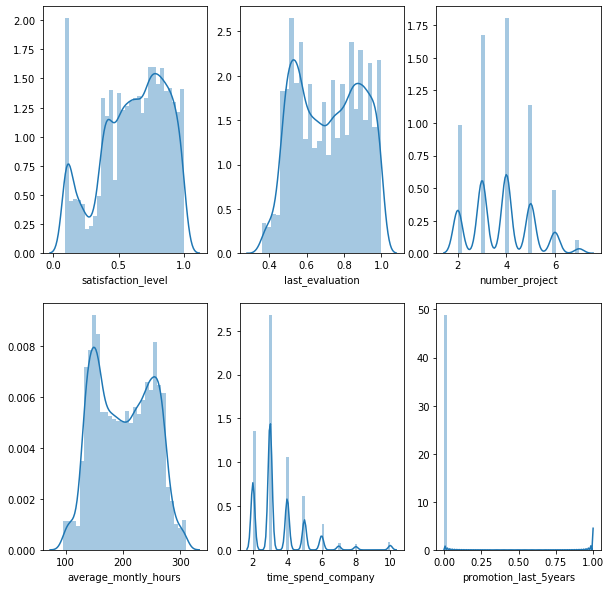

In [38]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df['last_evaluation'], ax = ax[0,1]) 
sns.distplot(df['number_project'], ax = ax[0,2]) 
sns.distplot(df['average_montly_hours'], ax = ax[1,0]) 
sns.distplot(df['time_spend_company'], ax = ax[1,1]) 
sns.distplot(df['promotion_last_5years'], ax = ax[1,2])
plt.show()

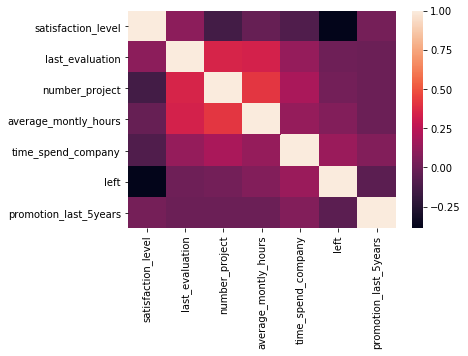

In [13]:
sns.heatmap(df.corr())

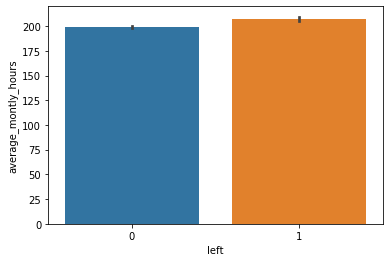

In [66]:
sns.barplot(x='left',y='average_montly_hours',data=df)

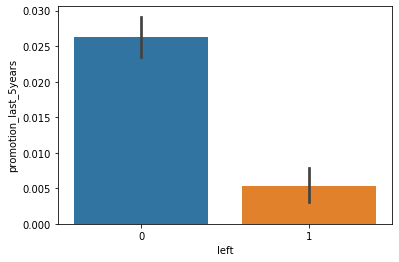

In [67]:
sns.barplot(x='left',y='promotion_last_5years',data=df)

In [ ]:
From the data analysis so far we can conclude that we will use following variables as dependant variables in our model
*Satisfaction Level
*Average Monthly Hours
*Promotion Last 5 Years
*salary

In [14]:
df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]

In [15]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [ ]:
But salary is Text Data It can conveted to numbers so will use dummy variable for that.

# Converting Categorical Feature

In [16]:
salary=pd.get_dummies(df['salary'],drop_first=True)

In [17]:
df.drop(['salary'],axis=1,inplace=True)

In [18]:
df=pd.concat([df,salary],axis=1)

In [19]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,low,medium
0,0.38,157,0,1,1,0
1,0.80,262,0,1,0,1
2,0.11,272,0,1,0,1
3,0.72,223,0,1,1,0
4,0.37,159,0,1,1,0


In [ ]:
**Now our Data is Ready to Apply Algorithm

# Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('left',axis=1),
                                               df['left'],test_size=0.30,
                                               random_state=1)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()

In [26]:
model.fit(x_train,y_train)

C:\Users\scs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions=model.predict(x_test)

# Evalution

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3416
           1       0.55      0.27      0.36      1084

    accuracy                           0.77      4500
   macro avg       0.67      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500



In [30]:
print(confusion_matrix(y_test,predictions))

[[3174  242]
 [ 790  294]]


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,predictions)

In [39]:
accuracy

0.7706666666666667

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('left',axis=1),
                                               df['left'],test_size=0.30,
                                               random_state=1)

In [39]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
pred = dtree.predict(x_test)

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3416
           1       0.82      0.83      0.82      1084

    accuracy                           0.91      4500
   macro avg       0.88      0.89      0.88      4500
weighted avg       0.91      0.91      0.91      4500



In [45]:
print(confusion_matrix(y_test,pred))

[[3212  204]
 [ 183  901]]


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rforest=RandomForestClassifier(n_estimators=50)

In [53]:
rforest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rforest_pred=rforest.predict(x_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,rforest_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3416
           1       0.86      0.85      0.85      1084

    accuracy                           0.93      4500
   macro avg       0.90      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



In [58]:
print(confusion_matrix(y_test,rforest_pred))

[[3262  154]
 [ 161  923]]
